<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_3/3_2_K_means_Color_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

from sklearn import set_config
set_config(display='text')

**Завантажуємо зображення**

Image shape: (427, 640, 3)
dtype: uint8


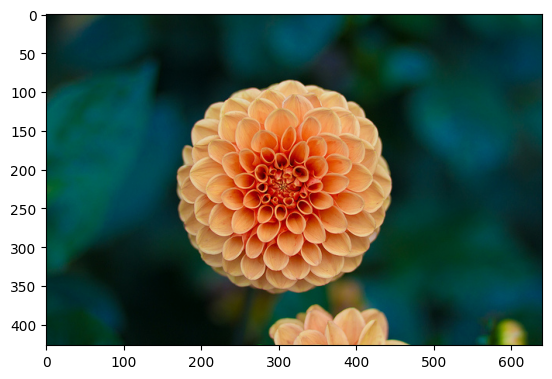

In [2]:
img = load_sample_image("flower.jpg")
H, W, C = img.shape
print("Image shape:", img.shape)
print("dtype:", img.dtype)

plt.imshow(img)
plt.show()


Зображення можна уявити як набір точок у 3D-просторі.
Кожен піксель = вектор (R, G, B).
Алгоритм k-means шукає k «репрезентативних» кольорів (центроїдів), а потім замінює кожен піксель найближчим центроїдом.

In [3]:
data = img / 255.0  # нормалізуємо до [0,1]
pixels = data.reshape(-1, 3)

#K-means працює у цьому 3-вимірному просторі: шукає «близькі» вектори і об’єднує їх у кластери
k = 4  # кількість кольорів
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(pixels)

KMeans(n_clusters=4, n_init=10, random_state=0)

**Замінюємо кожен піксель найближчим центроїдом**

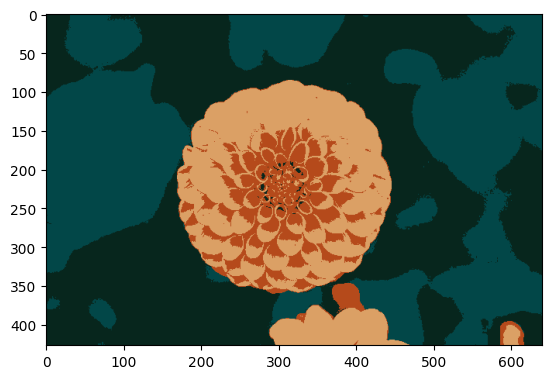

In [4]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]
quantized_img = new_colors.reshape(img.shape)

plt.imshow(quantized_img)
plt.show()

In [5]:
#Формат uint8 дозволяє закодувати 16,7 мільйона кольорів (кількість можливих комбінацій у зображені з трьома каналами)
#256×256×256 (але кожне конкретне зображення зазвичай містить значно менше унікальних кольорів)
unique_colors = np.unique(img.reshape(-1, 3), axis=0)
print("Унікальних кольорів у вихідному зображені:", unique_colors.shape[0])
unique_colors = np.unique(quantized_img.reshape(-1, 3), axis=0)
print("Унікальних кольорів в перетвореному зображені:", unique_colors.shape[0])

Унікальних кольорів у вихідному зображені: 62941
Унікальних кольорів в перетвореному зображені: 4
